# Chapter 5 - Algorithms for supervised learning 
The following exercises test your familiarity with the content of chapter 5. The corresponding [tutorial notebook](https://github.com/Humboldt-WI/bads/blob/master/tutorials/5_nb_supervised_learning.ipynb) was quite heavy including a walkthrough of building logit and tree models from scratch. Given the algorithm-heavy tutorial, we opted for a somewhat light exercise session that basically allows you to verify some of the claims made in the lecture. Specifically, the exercise revisits the lecture part on linear and logistic regression for classification. After completing the exercises, you will have gained even more confidence in logistic regression being the better approach for classification. Further, and this is the main point of the tasks, you will have further improved your Python programming skills. 

Have fun with the following tasks.

In [2]:
# Import some libraries
import numpy as n
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)  # Set parameters for plotting

## Exercise 1: 
We established in the lecture, that the linear regression model is not suitable for classification problems. Let's test this claim empirically.

### 1.1 Synthetic data
Create a synthetic data set for binary classification using the sklearn function `make_blobs()`. In a nutshell, the function creates synthetic data from multi-dimensional Gaussian distributions. Have a look into the documentation for further details. You have also seen this function in action in a previous tutorial on [descriptive learning](https://github.com/Humboldt-WI/bads/blob/master/tutorials/2_nb_descriptive_analytics.ipynb).

Your data set display the following characteristics: 
- We want to plot the data so use only two features
- Make sure your data is suitable for binary classification 
- Ensure that the means of your class-specific Gaussians are [1, 1] and [4, 4], respectively. 

Once you have created the data, illustrate your two-class problem by means of a scatter plot.

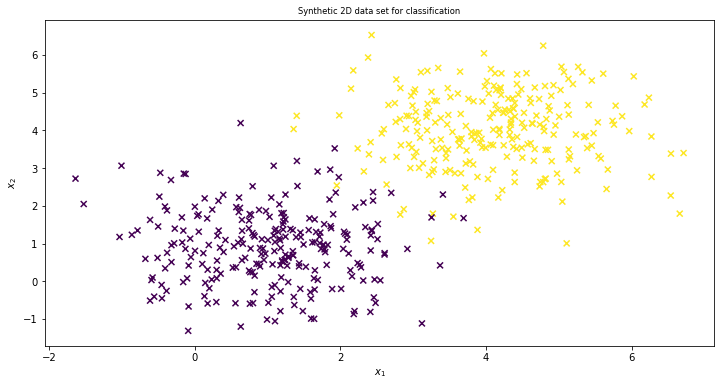

In [29]:
# Synthetic data creation 
from sklearn.datasets import make_blobs  # import sklearn function

n = 500                                  # number of data points
means = [[1, 1], [4, 4]]                 # Set the mean vectors for two Gaussians
X, y = make_blobs(n_samples=n, 
                  centers=means,
                  random_state=888)

# Scatter plot of the data
plt.title("Synthetic 2D data set for classification", fontsize='small')
plt.scatter(X[:,0], X[:,1], c=y, marker='x')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

**A few remarks on the above solution:**
First, by setting the mean vectors of the class-specific Gaussians we implicitly specify that create data with two features and two classes. To see this, consider the following examples.

In [26]:
# Each mean vector has three elements so we create data in 3 dimensions
tmp_X, tmp_y = make_blobs(n_samples=n, centers=means_3d)
print("3D data:", tmp_X.shape, " with 2 classes: ", np.unique(tmp_y))

means_3classes =  [[1, 1], [2, 2], [4, 4]]  # Having three mean vectors results in three classes
tmp_X, tmp_y = make_blobs(n_samples=n, centers=means_3classes)
print("2D data:", tmp_X.shape, " with 3 classes: ", np.unique(tmp_y))

means_3classes_3d =[[1, 1, 1], [2, 2, 2], [4, 4, 4]]  # Combining the above examples to create a 3-class problem in 3 dimensions
tmp_X, tmp_y = make_blobs(n_samples=n, centers=means_3classes_3d)
print("3D data:", tmp_X.shape, " with 3 classes: ", np.unique(tmp_y))

3D data: (500, 3)  with 2 classes:  [0 1]
2D data: (500, 2)  with 3 classes:  [0 1 2]
3D data: (500, 3)  with 3 classes:  [0 1 2]


Of course, you can also pick different feature values for the mean vector of one class. So when setting, for example, `means_3classes=[[1, 1], [2, 2], [4, 4]]` above, using the same feature values was only for convenience. We could also create our data as `means_3classes=[[1, 2], [3, 4], [1.5, 4.5]]`. We only say where in the feature space we want to set the mean of a feature. 

Second, having the mean values for each feature differ between classes, we implicitly ensure that the feature is informative. Put differently, the value of a feature comprises information about the value of the target variable. You can confirm this visually as follows: 

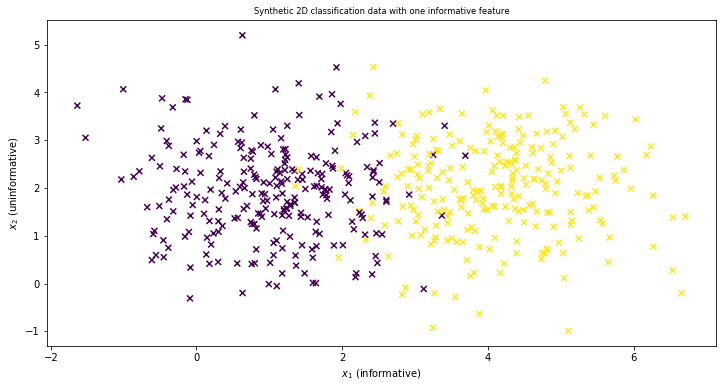

In [28]:
means = [[1, 2], [4, 2]]                 # Set the mean vectors for two Gaussians such that x1 is informative and x2 is not
tmp_X, tmp_y = make_blobs(n_samples=n, 
                  centers=means,
                  random_state=888)

# Scatter plot of the data
plt.title("Synthetic 2D classification data with one informative feature", fontsize='small')
plt.scatter(tmp_X[:,0], tmp_X[:,1], c=tmp_y, marker='x')
plt.xlabel("$x_1$ (informative)")
plt.ylabel("$x_2$ (uninformative)")
plt.show()

In the above plot, knowing the value of $x_2$ tells you nothing about whether the corresponding data point is more likely to be a positive or a negative. On the contrary, data points of different classes differ notably in their values of $x_1$. 

### 1.2 Linear regression
We discussed the analytical solution to the least-squares loss minimization problem in the lecture. To recall, using our standard notation, we can compute the regression parameters $\beta$ by 
$$ \beta^* = \left( X^{\top} X \right)^{-1}  X^{\top}  y $$

Calculate $\beta^*$ using plain numpy. Recall that you need to augment $X$ with a column of ones to ensure that your regression model includes an intercept.  

In [30]:
# Add a constant to the synthetic data:
const = np.ones((n,1))  # array of ones of the same length as X

# Many options to integrate our constant into the data matrix
# Option 1 to add the constant to X
X_ =np.c_[const,X] 
print("Option 1 gives shape: ", X_.shape)

# Option 2 to add the constant to X
X_ = np.hstack((const, X))
print("Option 2 gives shape: ", X_.shape)

# Option 3 to add the constant to X
X_ = np.concatenate((const, X), axis=1) 
print("Option 3 gives shape: ", X_.shape)

Option 1 gives shape:  (500, 3)
Option 2 gives shape:  (500, 3)
Option 3 gives shape:  (500, 3)


In [33]:
# Compute the OLS estimate 
XtX = np.dot(X_.T, X_)

XtXinv = np.linalg.inv(XtX)

beta = np.dot( np.dot(XtXinv, X_.T), y)

print("OLS estimate is: ", beta, " whereby the first element gives the intercept.") 

OLS estimate is:  [-0.18105035  0.13593387  0.13534895]  whereby the first element gives the intercept.


### 1.3 Plotting
Recreate the 2D chart from the previous exercise. This time, however, your graph should also show the decision surface that corresponds to your regression model from task 1.2.

A potential challenge with the task is that we have to plot the regression function in our feature space spanned by $x_1$ and $x_2$. To that end, we note that the regression function is define by the set of points for which the following condition holds: 
$$ \beta_0 + \beta_1 x_1 + \beta_2 x_2 = 0 $$

The regression function acts like a classifier in that we can consider every data point for which the above equation evaluates to a value greater than zero as being classified as a positive, whereas data points for which the equation evaluates to a value less than zero as being classified as a negative. To plot this classifier, we simply solve for $x_2$ to obtain: 
$$ x_2 = - \frac{\beta_0}{\beta_2} - \frac{\beta_1}{\beta_2} x_1 $$

This is the form we can use for plotting. Set values for $x_1$, compute the corresponding values of $x_2$ according to the above equation, and draw the tuples $\left( x_1, x_2 \right)$ using, e.g., the `plot()` function.

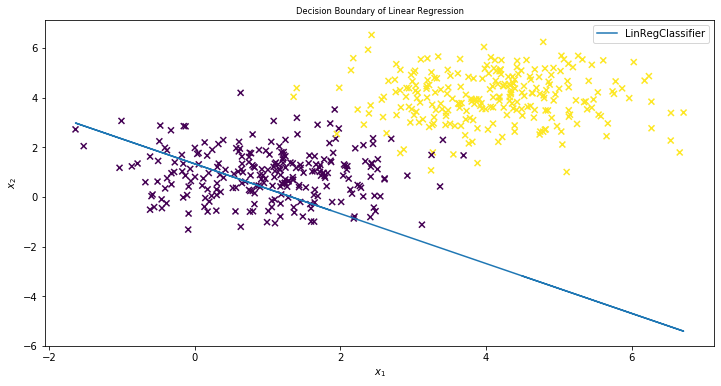

In [47]:
# Compute x_2 according to our regression equation
x_1 = X[:,0]  # we define this helper variable to make the code more readable
x_2 = - beta[0] / beta[2] - beta[1] / beta[2] * x_1

# The plotting works as above just that we also plot our regression function
plt.title("Decision Boundary of Linear Regression", fontsize='small')
plt.scatter(X[:,0], X[:,1], c=y, marker='x') 
plt.plot(x_1,x_2, label='LinRegClassifier') # plot classifier
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.legend();

### 1.4 Residuals
Compute and plot the residuals of your linear regression model. Inspecting the graph, how do you judge the adequacy of the linear regression model for the data at hand.

Do both ways to calculate the residuals give the same result? True


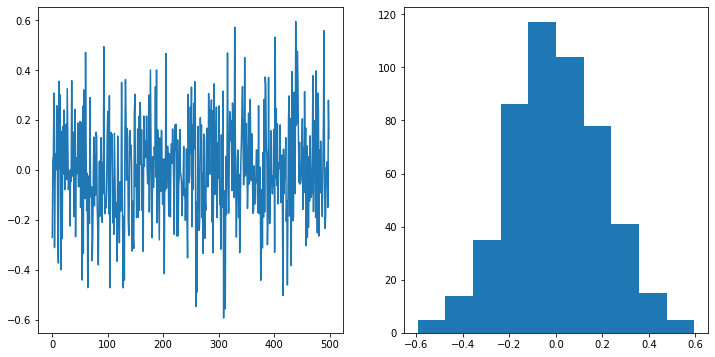

In [35]:
# For illustration, we first demonstrate how to compute the resdiduals in a loop. 
# This approach is maybe more intuitive (but computationally inefficient)

# Create empty list to save residuals
residuals = []

# Loop through each observation to calculate the residuals
for i in np.arange(X.shape[0]):
  pred = beta[0] + beta[1]*X[i, 0] + beta[2]*X[i,1] # make the prediction using the calculated ß-values and the observation as inputs
  res = y[i] - pred # calculate residual by subtracting prediction value from the true value
  residuals.append(res)


# A better (because more efficient) approach to calculate the residuals is to use matrix multiplication
y_hat = np.dot(X_, beta)
residuals_2 = y - y_hat
print("Do both ways to calculate the residuals give the same result? {}".format(not any(residuals-residuals_2)))

# Plot the residuals
plt.subplot(1,2,1)
plt.plot(residuals);
plt.subplot(1,2,2)
plt.hist(residuals);

**Interpretation:** Non-normality of the residuals is an indication for linear regression being an inappropriate model for the data at hand. To be fair, we do not find evidence for non-normal residuals in our setting. If you go back to the previous plot showing the separation of the classes by means of the linear regression function, you can make the point that the slope of the classifier is actually correct. The main problem is a bias that prohibits the model from finding the correct linear class boundary. To be clear, you can show that a linear classifier is the optimal choice for data in which the data points of different classes come from multivariate Gaussians.

To make at least one strong argument against linear regression, let's check whether its predictions are indeed outside the zero-one range, which proofs that the fit to the data is far from ideal and residuals are unnecessarily large. 

In [36]:
print("The maximum and minimum predicted value are {:.4} and {:.4}, respectively.".format(np.max(y_hat), np.min(y_hat)))

The maximum and minimum predicted value are 1.374 and -0.3705, respectively.


### 1.5 Logistic regression
Now estimate a logistic regression model for your synthetic data set using standard sklearn functionality. Reproduce the plot from task 1.3 and incorporate the class boundary from the logistic model in the plot. It should also include the result from the linear regression. By visual inspection, does the logit model give a better fit? Briefly state your opinion. 

In [38]:
# Import library 
from sklearn.linear_model import LogisticRegression

# Fit logistic regression model
log = LogisticRegression()
log.fit(X, y)

# To plot the logistic regression classifier, we use the same logit as above for linear regression.
# This implies that we will manually calculate the values of x_2 given x_1. To do this, we need
# to extract the estimates of the intercept and the regression coefficients from the fitted model
print("Estimated intercept is: ", log.intercept_)
print("Estimated coefficients are: ", log.coef_)

Estimated intercept is:  [-11.50001793]
Estimated coefficients are:  [[2.49261878 2.10000013]]


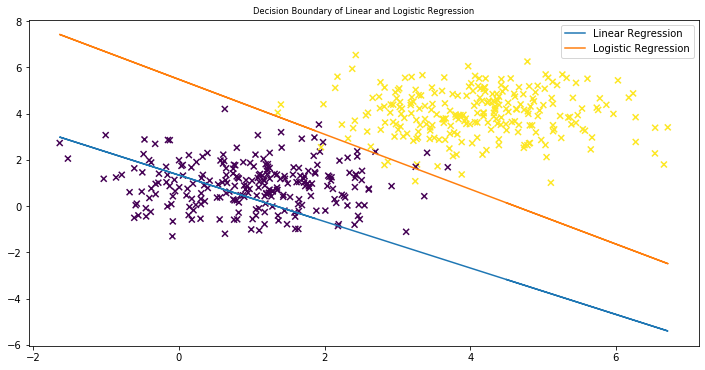

In [48]:
# From here on, we simply need to copy the above approach to compute and plot the decision surface that the logit model implements.
# In view of the above output, we note that the logit model encapsulates the values that we need in arrays. 
# So we have to use appropriate indecies in our calculation

x_2_logit = - log.intercept_ / log.coef_[0][1] - log.coef_[0][0] / log.coef_[0][1] * x_1  # same as above just with adjusted code to extract beta from the logit model

# Final plot with everything included
plt.title("Decision Boundary of Linear and Logistic Regression", fontsize='small')
plt.scatter(X[:,0], X[:,1], c=y, marker='x')
plt.plot(x_1,x_2, label='Linear Regression')
plt.plot(x_1,x_2_logit, label='Logistic Regression')
plt.legend()
plt.show()

**Discussion of the plot:** The decision boundary of the logistic regression better approximates the task at hand. The slopes of both boundaries seem alike, however the logistic regression better divides the yellow and purple observations into two groups (higher purity).

In [52]:
# Finally, we can compare the residuals of our two models, computing, for example, the mean-absolut-error
mae_linreg = np.sqrt( np.sum(np.abs(residuals)) / len(residuals) )
print("MAE linear regression: {:.4f}".format(mae_linreg))

res_logit = y-log.predict_proba(X)[:,1]
mae_linreg = np.sqrt( np.sum(np.abs(res_logit)) / len(res_logit) )
print("MAE logistic regression: {:.4f}".format(mae_linreg))

MAE linear regression: 0.4020
MAE logistic regression: 0.1732


As expected, the residuals of the logit model are much lower, confirming that it offers a better solution for classifying our synthetic data.

### Extension
As an extension to the exercise, we can also create a more appealing plot of the way in which our classifier separates the data. In a nutshell, the below code does the following:
- Create a many data points that define a grid over our feature space using the `mgrid()` function
- Getting the model predictions for each of the data points, which is equivalent to querying the model prediction for every point in the feature space <br>(not really every point. It is rather the resolution of our grid that governs how often we query the model for a prediction)
- Plot the model predictions across the entire feature space
- Add a legend to the plot to illustrate which regions of the feature space are classified as belonging to which class. More specifically, we show the class probability that our model has estimated.

Enough of introduction. Let's look at the actual code.

In [82]:
# We first illustrate the code to create our grid with a small-sized example that facilitates manual inspection of the data.
# Specifically, we create a coarse grid over the features values x_1 = -2, -1, ..., 2 and x_2 = -2, -1, ..., 2.
# The example is to help you grasp the functioning of mgrid
x_1, x_2 = np.mgrid[-2:2:1, -2:2:1]
print("Shape of x_1: ", x_1.shape)
print("Shape of x_2: ", x_2.shape)
print("\n This is x_1:\n", x_1)
print("\n This is x_2:\n", x_2)

# Combine x_1 and x_2 to obtain a 2D array that mimics data points in our 2D feature space
grid = np.column_stack((x_1.ravel(), x_2.ravel()))
print("\n This is our coarse grid:\n", grid)

Shape of x_1:  (4, 4)
Shape of x_2:  (4, 4)

 This is x_1:
 [[-2 -2 -2 -2]
 [-1 -1 -1 -1]
 [ 0  0  0  0]
 [ 1  1  1  1]]

 This is x_2:
 [[-2 -1  0  1]
 [-2 -1  0  1]
 [-2 -1  0  1]
 [-2 -1  0  1]]

 This is our coarse grid:
 [[-2 -2]
 [-2 -1]
 [-2  0]
 [-2  1]
 [-1 -2]
 [-1 -1]
 [-1  0]
 [-1  1]
 [ 0 -2]
 [ 0 -1]
 [ 0  0]
 [ 0  1]
 [ 1 -2]
 [ 1 -1]
 [ 1  0]
 [ 1  1]]


In [83]:
# Next we use the same appraoch as above but create a fine grid
x_1, x_2 = np.mgrid[-2:8:0.01, -2:8:0.01]
grid = np.column_stack((x_1.ravel(), x_2.ravel()))
print("Shape of our grid: ", grid.shape)

Shape of our grid:  (1000000, 2)


In [85]:
# Produce probability predictions for each data point in our grid
probs = log.predict_proba(grid)
print("Shape of raw output: ", probs.shape)

Shape of raw output:  (1000000, 2)


In [86]:
# As usual, we can index the logit model output to extract the probability predictions for one class
probs = probs[:, 1]
print("Shape of probabilistic predictions: ", probs.shape)

Shape of probabilistic predictions:  (1000000,)


In [87]:
# We still need to reshape our predictions for plotting. This is kinda reversing the colum_stack operations
probs = probs.reshape(x_1.shape)
print("Shape of pot-ready predictions: ", probs.shape)

Shape of pot-ready predictions:  (1000, 1000)


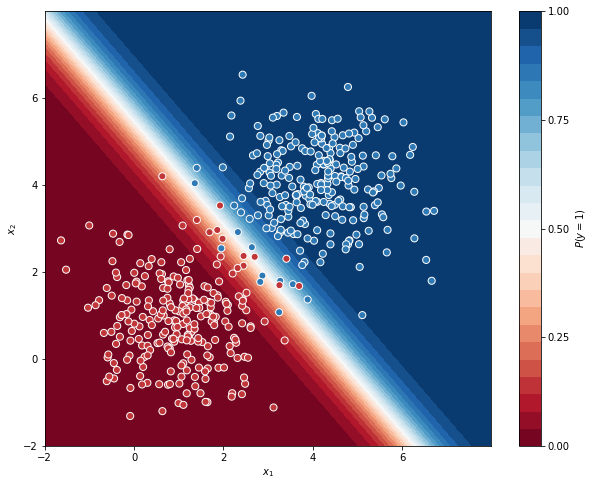

In [91]:
# Finally, we are ready to create our plot.
# This is the 'new' part
f, ax = plt.subplots(figsize=(10, 8))
contour = ax.contourf(x_1, x_2, probs, 25, cmap="RdBu", vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])
# From here on, we basically plot our data as done many times above
ax.scatter(X[:,0], X[:,1], c=y, s=50, cmap="RdBu", vmin=-.2, vmax=1.2, edgecolor="white", linewidth=1)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

We conclude with this beautiful picture showing how our logit model  associates different region of the feature space with higher or lower probability of belonging to the positive class. We nicely observe the uncertainty of the model in the area where the true linear class boundary is located, i.e., the optimal separation of our classes. 